In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d drscarlat/melanoma

Dataset URL: https://www.kaggle.com/datasets/drscarlat/melanoma
License(s): unknown
100% 5.25G/5.26G [01:10<00:00, 139MB/s]
100% 5.26G/5.26G [01:10<00:00, 79.9MB/s]


In [ ]:
# prompt: code for unziping file
import zipfile
zip_ref=zipfile.ZipFile('/content/melanoma.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image

In [ ]:
import os
import shutil

# Function to remove .ipynb_checkpoints folder from a directory
def remove_checkpoints(directory):
    for root, dirs, files in os.walk(directory):
        if '.ipynb_checkpoints' in dirs:
            # Remove the folder
            shutil.rmtree(os.path.join(root, '.ipynb_checkpoints'))
            print(f"Removed: {os.path.join(root, '.ipynb_checkpoints')}")

# Paths to your train and test directories
train_dir = '/content/DermMel/train_sep'
test_dir = '/content/DermMel/test'

# Remove .ipynb_checkpoints from both directories
remove_checkpoints(train_dir)
remove_checkpoints(test_dir)


Removed: /content/DermMel/train_sep/.ipynb_checkpoints
Removed: /content/DermMel/test/.ipynb_checkpoints


In [ ]:
 #Paths to your dataset directories
train_dir = '/content/DermMel/train_sep'  # replace with your training directory path
test_dir = '/content/DermMel/test'    # replace with your validation/test directory path

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=64, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=64, class_mode='binary')

Found 10682 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [ ]:
# Load VGG16 Pre-trained Model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base_model layers
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Adding custom layers on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])

In [ ]:
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


167/167 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.7009 - loss: 0.7151 - val_accuracy: 0.8276 - val_loss: 0.3886
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.8084 - loss: 0.4232 - val_accuracy: 0.8349 - val_loss: 0.3795
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8185 - loss: 0.4065 - val_accuracy: 0.8326 - val_loss: 0.3924
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.8318 - loss: 0.3819 - val_accuracy: 0.8492 - val_loss: 0.3583
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.8361 - loss: 0.3649 - val_accuracy: 0.8677 - val_loss: 0.3161
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.8431 - loss: 0.3562 - val_accuracy: 0.8644 - val_loss: 0.3223
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.8500 - loss: 0.3397 - val_accuracy: 0.8593 - val_loss: 0.3508
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.8448 - loss: 0.3480 - val_accuracy: 0.863

In [ ]:
# Plot training and validation accuracy/loss
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

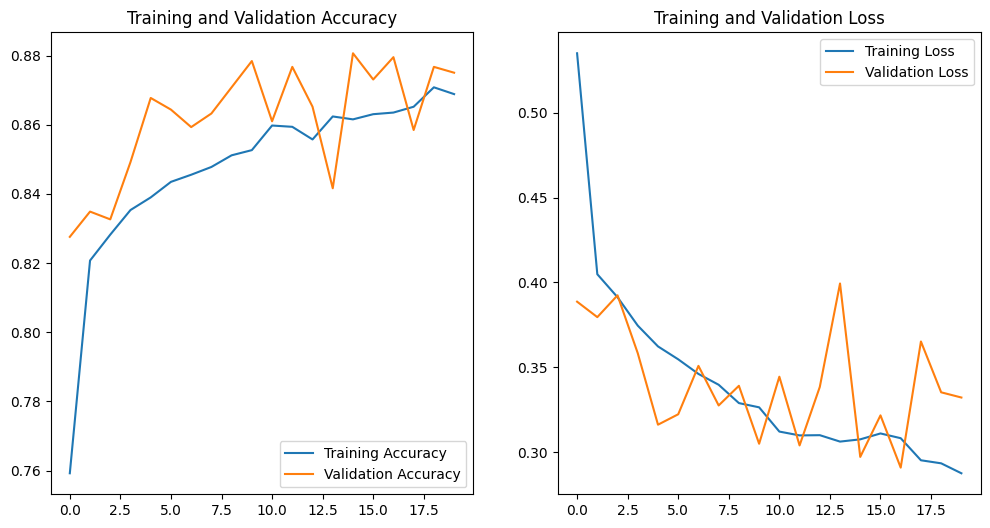

56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 393ms/step - accuracy: 0.8803 - loss: 0.3069
Test Accuracy: 87.50%


In [ ]:
# Plot accuracy and loss
plot_accuracy_loss(history)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,349,253 (92.89 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 6,423,044 (24.50 MB)

In [ ]:
# Save the model
model.save('vgg16_skin_cancer_model.h5')

In [ ]:
# Predict on unseen images
def predict_unseen_images(model, image_folder):
    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Preprocess the image

        # Predict the class (0 = Non-Melanoma, 1 = Melanoma)
        prediction = model.predict(img_array)
        predicted_class = 'Melanoma' if prediction > 0.5 else 'Non-Melanoma'
        predicted_value = prediction[0][0]

        print(f"Image: {img_name}, Predicted Class: {predicted_class}, Predicted Value: {predicted_value:.4f}")

# Predict on unseen images
unseen_images_folder = 'path_to_unseen_images_folder'  # replace with the folder path containing unseen images
predict_unseen_images(model, unseen_images_folder)